# Atlas description 

### Wang
- simetric hemispheres (163842)
- 25 ROIs

In [13]:
from process_data import process_atlas_file
import pandas as pd

In [25]:
atlas_dir= '/Users/mariedelvalle/Documents/data/HCP/atlasmgz'

atlas_glasser = pd.DataFrame(process_atlas_file(atlas_dir, 'Glasser'))
atlas_wang = pd.DataFrame(process_atlas_file(atlas_dir, 'Wang'))

In [23]:
def get_frequency(df):
    frequency_list = []
    for column in df.columns:
        frequency = df[column].value_counts().sort_index()
        frequency_df = pd.DataFrame(frequency).reset_index()
        frequency_df.columns = ['value', 'frequency']
        frequency_df['column'] = column
        frequency_list.append(frequency_df)
    combined_frequency_df = pd.concat(frequency_list, ignore_index=True)
    return combined_frequency_df



In [27]:
glasser_frequency_df = get_frequency(atlas_glasser)
print(glasser_frequency_df)
wang_frequency_df = get_frequency(atlas_wang)
print(wang_frequency_df)

     value  frequency column
0      1.0       4572     lh
1      2.0        413     lh
2      3.0        526     lh
3      4.0       2972     lh
4      5.0       1878     lh
..     ...        ...    ...
355  176.0        564     rh
356  177.0        693     rh
357  178.0        624     rh
358  179.0        614     rh
359  180.0        410     rh

[360 rows x 3 columns]
    value  frequency column
0     0.0     137182     rh
1     1.0       1035     rh
2     2.0       1088     rh
3     3.0        889     rh
4     4.0        859     rh
5     5.0        626     rh
6     6.0        678     rh
7     7.0        504     rh
8     8.0        231     rh
9     9.0        419     rh
10   10.0        162     rh
11   11.0        424     rh
12   12.0        152     rh
13   13.0        385     rh
14   14.0        316     rh
15   15.0        568     rh
16   16.0        453     rh
17   17.0        800     rh
18   18.0        835     rh
19   19.0        682     rh
20   20.0        612     rh
21   21.0   

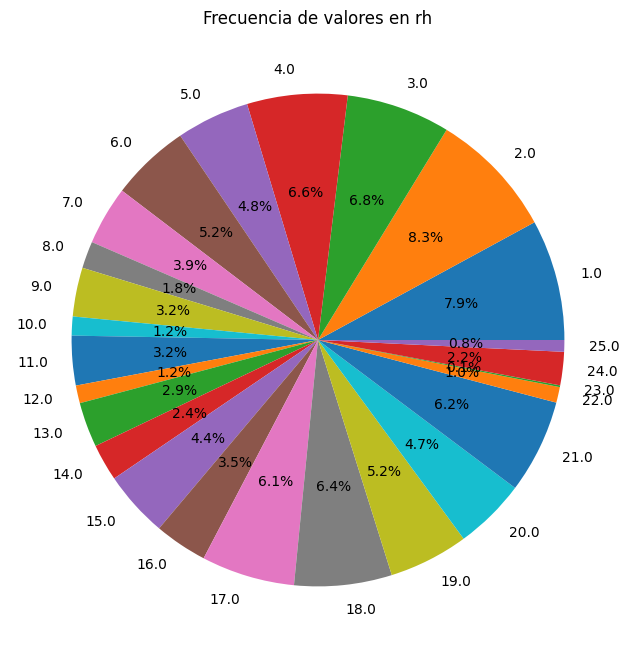

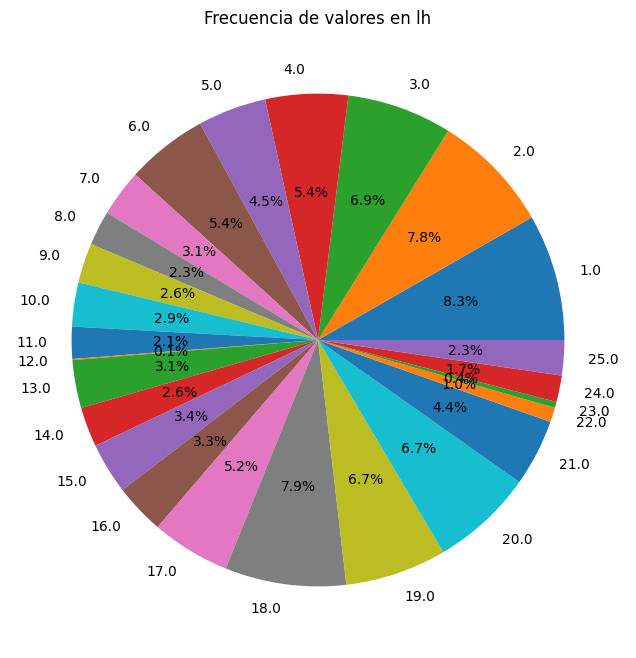

In [29]:
# exclude 0
wang_frequency_df = wang_frequency_df[wang_frequency_df['value']>0]
for column in wang_frequency_df['column'].unique():
    column_freq_df = wang_frequency_df[wang_frequency_df['column'] == column]
    plt.figure(figsize=(8, 8))
    plt.pie(column_freq_df['frequency'], labels=column_freq_df['value'], autopct='%1.1f%%')
    plt.title(f'Frecuencia de valores en {column}')
    plt.show()

# Data description (HCP)

- 181 subjects.
- variables : 
    - ang : polar angle
    - ecc : eccentricity
    - gain
    - meanvol
    - R2
    - rfsize : pRF size
- each subject has symetric hemispheres (163842 voxels).
- ROIs : 

# Load and check data

In [4]:
import pandas as pd

# Cargar el DataFrame desde el archivo Parquet
df = pd.read_csv('/Users/mariedelvalle/Documents/projects/brain_lateralization_study/data/HCP_data.csv')
display(df.head())

KeyboardInterrupt: 

In [4]:
filtered_df = df.loc[df['rh_roi'] == 4]
selected_columns = ['subject_id'] + [col for col in df.columns if col.startswith('rh')]
final_df = filtered_df[selected_columns]

final_df.to_csv("HCP_hV4.csv", index=False)

In [2]:
# chech data types
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30146928 entries, 0 to 30146927
Data columns (total 15 columns):
 #   Column      Dtype  
---  ------      -----  
 0   subject_id  int64  
 1   rh_R2       float64
 2   rh_meanvol  float64
 3   lh_meanvol  float64
 4   rh_ang      float64
 5   lh_gain     float64
 6   lh_R2       float64
 7   rh_ecc      float64
 8   rh_rfsize   float64
 9   rh_gain     float64
 10  lh_ang      float64
 11  lh_ecc      float64
 12  lh_rfsize   float64
 13  lh_roi      float64
 14  rh_roi      float64
dtypes: float64(14), int64(1)
memory usage: 3.4 GB


None

In [3]:
# stats summary
display(df.describe())

,subject_id,rh_R2,rh_meanvol,lh_meanvol,rh_ang,lh_gain,lh_R2,rh_ecc,rh_rfsize,rh_gain,lh_ang,lh_ecc,lh_rfsize,lh_roi,rh_roi
count,3.014693e+07,2.764379e+07,2.764379e+07,2.758749e+07,2.760370e+07,2.758749e+07,2.758749e+07,2.764379e+07,2.764379e+07,2.764379e+07,2.755988e+07,2.758749e+07,2.758749e+07,2.758749e+07,2.764379e+07
mean,3.998149e+05,3.990635e+00,1.140796e+04,1.116345e+04,1.745076e+02,3.538974e+01,3.809954e+00,4.904578e+00,1.540611e+00,3.763659e+01,1.758464e+02,5.216462e+00,1.626185e+00,1.006630e+00,9.472237e-01
std,2.934109e+05,9.788112e+00,1.751480e+03,1.676556e+03,1.001256e+02,1.226919e+02,9.809651e+00,5.166503e+00,2.501897e+00,1.273994e+02,1.127474e+02,5.118346e+00,2.555972e+00,3.920451e+00,3.750006e+00
min,1.006100e+05,-5.960464e-05,7.642343e+02,8.586746e+02,0.000000e+00,0.000000e+00,-5.960464e-05,0.000000e+00,3.973484e-06,0.000000e+00,0.000000e+00,0.000000e+00,1.765637e-06,0.000000e+00,0.000000e+00
25%,1.673390e+05,3.941774e-01,1.095120e+04,1.072591e+04,9.000000e+01,2.686650e+00,3.902078e-01,2.240000e-01,8.000000e-02,2.846337e+00,6.750000e+01,5.535993e-01,8.000000e-02,0.000000e+00,0.000000e+00
50%,2.179215e+05,8.662581e-01,1.167728e+04,1.142939e+04,1.781297e+02,4.372569e+00,8.279324e-01,3.230321e+00,1.997131e-01,4.756855e+00,1.698566e+02,3.859650e+00,2.548470e-01,0.000000e+00,0.000000e+00
75%,6.468225e+05,2.330720e+00,1.236800e+04,1.207668e+04,2.487185e+02,9.660924e+00,1.991022e+00,7.968000e+00,2.413080e+00,1.077103e+01,2.812509e+02,7.968000e+00,2.560000e+00,0.000000e+00,0.000000e+00
max,9.999990e+05,9.018983e+01,5.129471e+04,3.281446e+04,3.600000e+02,1.197583e+04,9.000063e+01,2.010101e+01,3.924570e+01,1.237936e+04,3.600000e+02,1.930203e+01,5.142571e+01,2.500000e+01,2.500000e+01


In [33]:
# null values per variable
print(df.isnull().sum())

df = df.dropna()

subject_id          0
rh_R2         2503136
rh_meanvol    2503136
lh_meanvol    2559440
rh_ang        2543232
lh_gain       2559440
lh_R2         2559440
rh_ecc        2503136
rh_rfsize     2503136
rh_gain       2503136
lh_ang        2587051
lh_ecc        2559440
lh_rfsize     2559440
lh_roi        2559440
rh_roi        2503136
dtype: int64


# Data Visualization

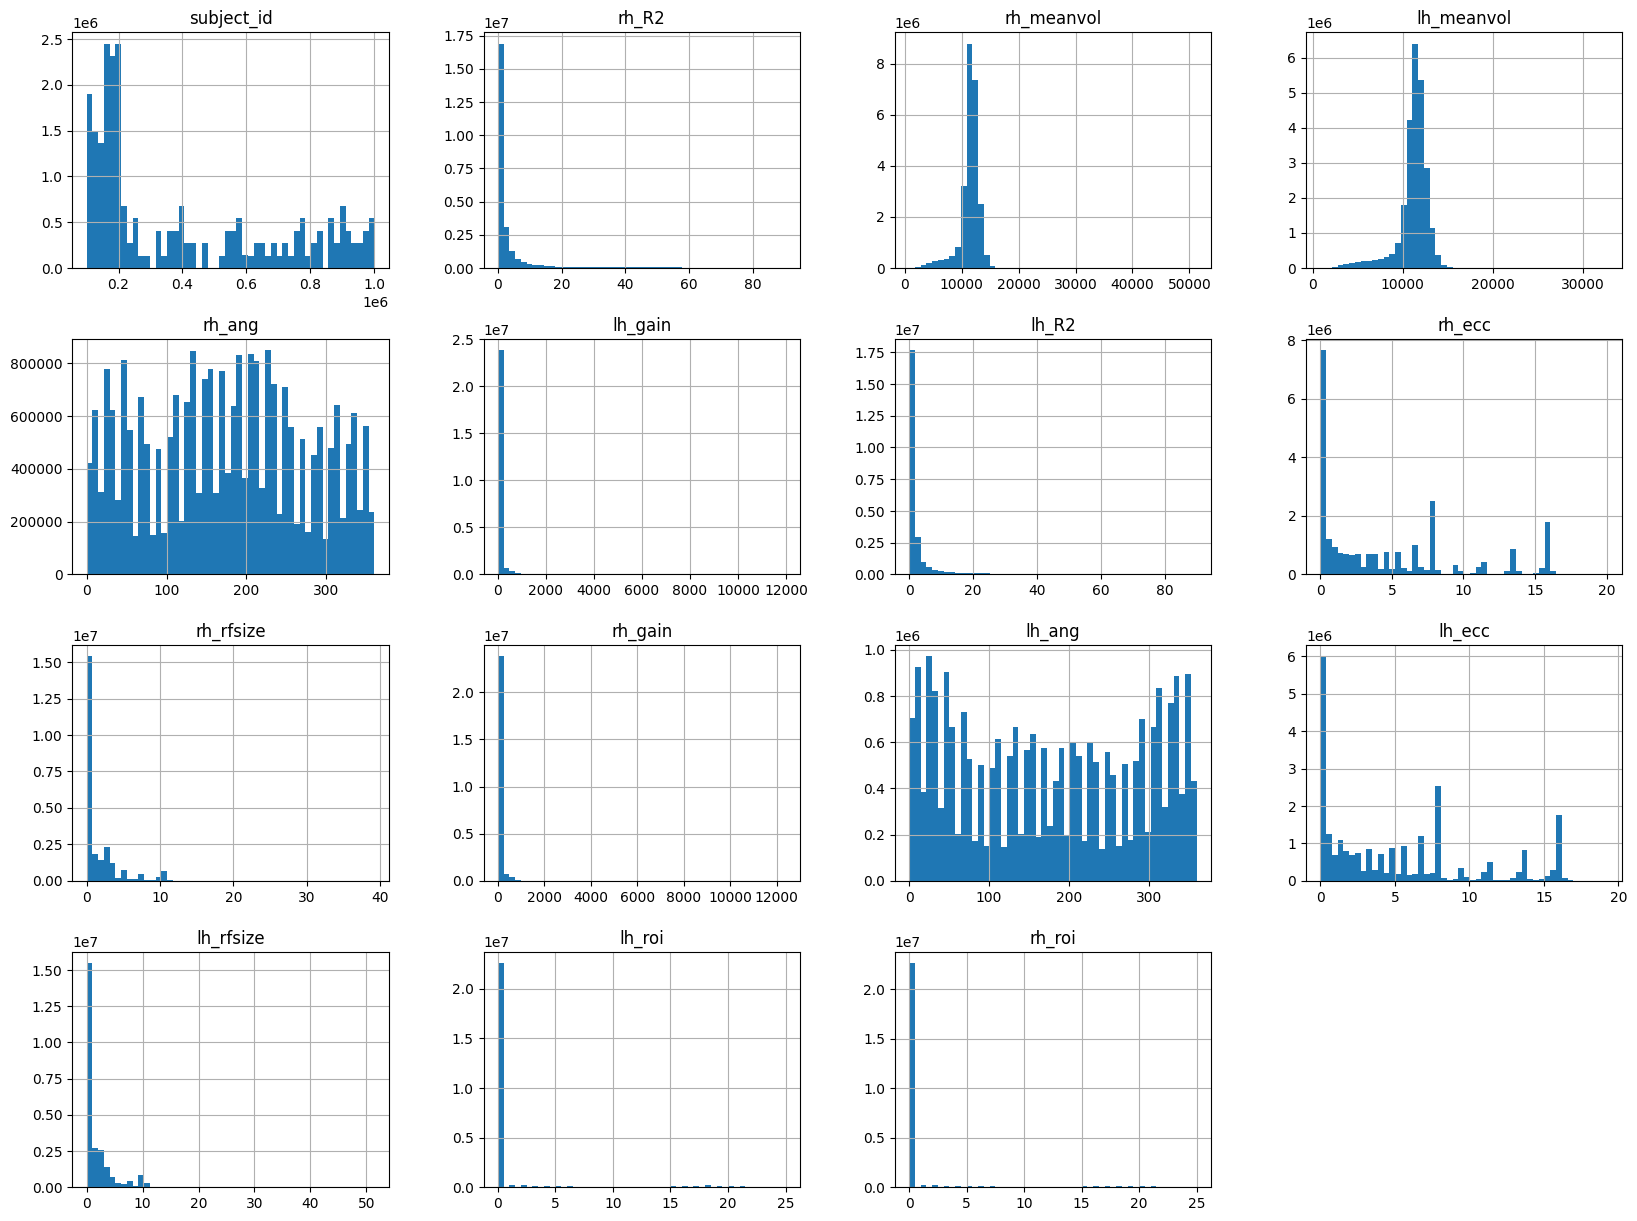

In [34]:
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(20, 15))
plt.show()

In [41]:
import matplotlib.pyplot as plt

# Suponiendo que tienes tus datos en DataFrames o Series llamados lh_roi, rh_roi, rh_rfsize, lh_rfsize

# Crear una figura con subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Gráfico 1: lh_rfsize vs. lh_roi
axs[0].bar(df['lh_roi'], df['lh_rfsize'], alpha=0.5)
axs[0].set_xlabel('lh_roi')
axs[0].set_ylabel('lh_rfsize')
axs[0].set_title('lh_rfsize vs. lh_roi')

# Gráfico 2: rh_rfsize vs. rh_roi
axs[1].bar(df['rh_roi'], df['rh_rfsize'], alpha=0.5)
axs[1].set_xlabel('rh_roi')
axs[1].set_ylabel('rh_rfsize')
axs[1].set_title('rh_rfsize vs. rh_roi')

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()


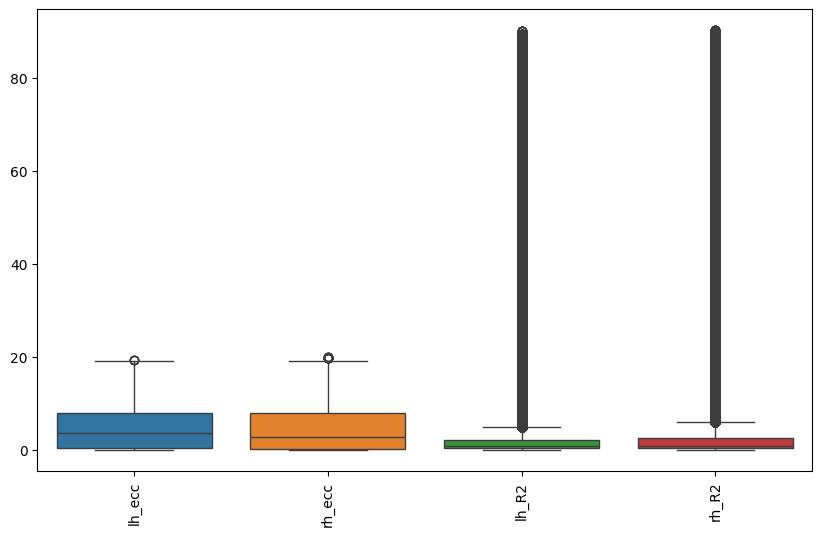

In [35]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['lh_ecc','rh_ecc','lh_R2','rh_R2']])
plt.xticks(rotation=90)
plt.show()

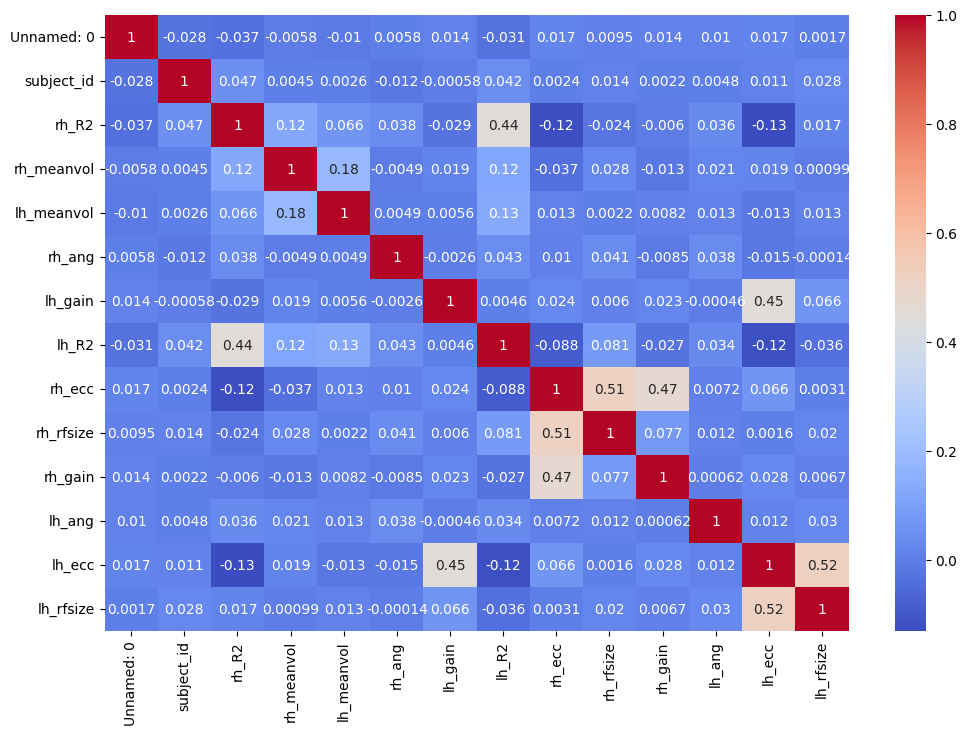

In [8]:
# correlation matrix

plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Hemisphere Comparison

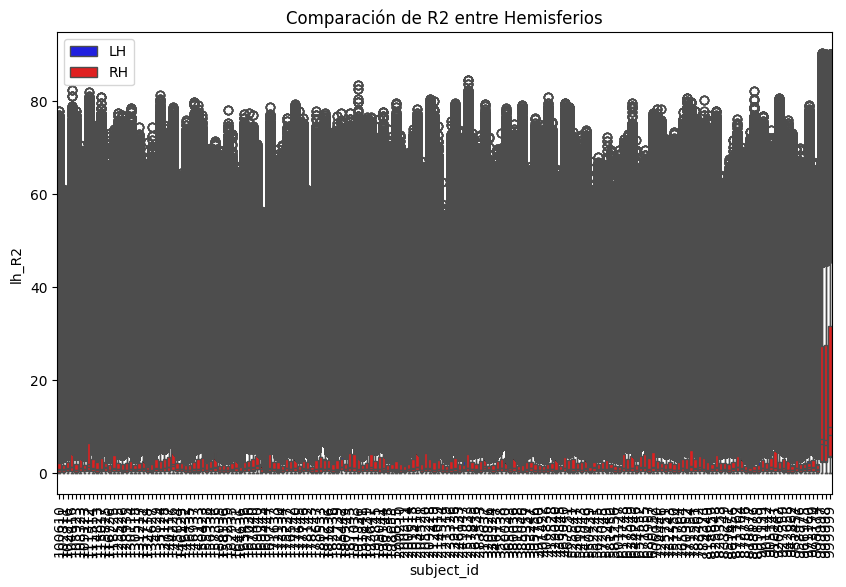

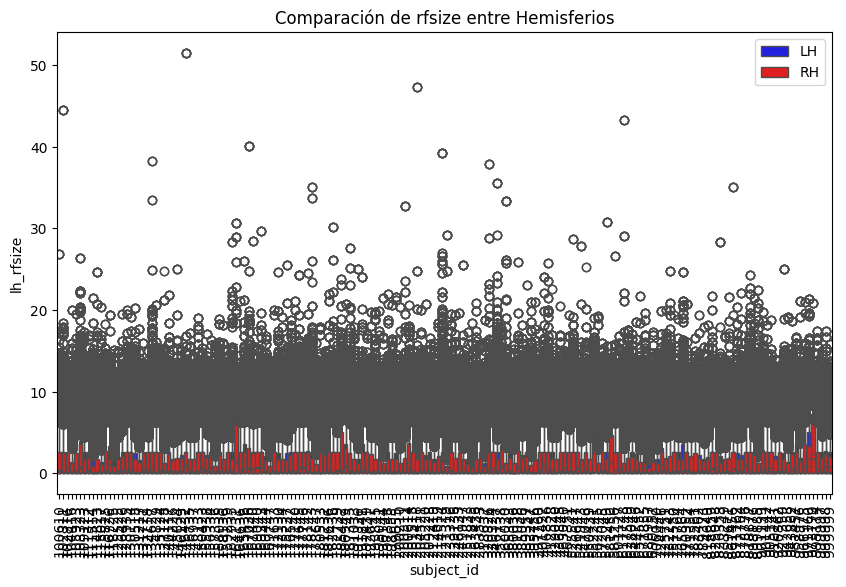

In [19]:
hemispheres = ['lh', 'rh']
measures = ['R2', 'rfsize']

for measure in measures:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='subject_id', y=f'lh_{measure}', data=df, color='blue', label='LH')
    sns.boxplot(x='subject_id', y=f'rh_{measure}', data=df, color='red', label='RH')
    plt.xticks(rotation=90)
    plt.title(f'Comparación de {measure} entre Hemisferios')
    plt.legend()
    plt.show()

# Cluster Analysis

In [20]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Seleccionar las variables para el clustering
features = df[[f'{hemi}_{measure}' for hemi in hemispheres for measure in measures]]

# Escalar los datos
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Aplicar KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Agregar los clusters al DataFrame original
df['cluster'] = clusters

# Visualizar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lh_ang', y='lh_ecc', hue='cluster', data=df, palette='viridis')
plt.title('Clustering de Sujetos basado en ang y ecc del Hemisferio Izquierdo')
plt.show()


/Users/mariedelvalle/Documents/projects/brain_lateralization_study/env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


KeyboardInterrupt: 